**Import modules + libraries**

In [1]:
# Import the relevant modules
import iris
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import iris.quickplot as qplt
import iris.plot as iplt
import datetime
import shutil
from six.moves import urllib
from pathlib import Path
from math import pi
import trackpy
from iris.time import PartialDateTime
import tobac
import warnings

In [2]:
# Import the libraries
import functions
import dictionaries

In [3]:
# Set up the warning messages
warnings.filterwarnings('ignore', category=UserWarning, append=True)
warnings.filterwarnings('ignore', category=RuntimeWarning, append=True)
warnings.filterwarnings('ignore', category=FutureWarning, append=True)
warnings.filterwarnings('ignore', category=pd.io.pytables.PerformanceWarning)

**Read in the tracks data (pandas dataframe from Save/Track.h5) + convert to datetime to make it easier to use**

In [4]:
#read in the Track.h5 file to a pandas dataframe
mcstracks_225=pd.read_hdf('Save/Jan_1998/Track_225.h5','table')
mcstracks_230=pd.read_hdf('Save/Jan_1998/Track_230.h5','table')
mcstracks_235=pd.read_hdf('Save/Jan_1998/Track_235.h5','table')
mcstracks_240=pd.read_hdf('Save/Jan_1998/Track_240.h5','table')
mcstracks_241=pd.read_hdf('Save/Jan_1998/Track_241.h5','table')
mcstracks_245=pd.read_hdf('Save/Jan_1998/Track_245.h5','table')

#convert ['timestr'] column to datetime in dataframe
mcstracks_225.timestr=mcstracks_225.timestr.astype(str)
mcstracks_225['datetime'] = pd.to_datetime(mcstracks_225.timestr.str.split(',\s*').str[0])
set(mcstracks_225['datetime'])

mcstracks_230.timestr=mcstracks_230.timestr.astype(str)
mcstracks_230['datetime'] = pd.to_datetime(mcstracks_230.timestr.str.split(',\s*').str[0])
set(mcstracks_230['datetime'])

mcstracks_235.timestr=mcstracks_235.timestr.astype(str)
mcstracks_235['datetime'] = pd.to_datetime(mcstracks_235.timestr.str.split(',\s*').str[0])
set(mcstracks_235['datetime'])

mcstracks_240.timestr=mcstracks_240.timestr.astype(str)
mcstracks_240['datetime'] = pd.to_datetime(mcstracks_240.timestr.str.split(',\s*').str[0])
set(mcstracks_240['datetime'])

mcstracks_241.timestr=mcstracks_241.timestr.astype(str)
mcstracks_241['datetime'] = pd.to_datetime(mcstracks_241.timestr.str.split(',\s*').str[0])
set(mcstracks_241['datetime'])

mcstracks_245.timestr=mcstracks_245.timestr.astype(str)
mcstracks_245['datetime'] = pd.to_datetime(mcstracks_245.timestr.str.split(',\s*').str[0])
set(mcstracks_245['datetime'])

{Timestamp('1998-01-01 00:30:00'),
 Timestamp('1998-01-01 01:30:00'),
 Timestamp('1998-01-01 02:30:00'),
 Timestamp('1998-01-01 03:30:00'),
 Timestamp('1998-01-01 04:30:00'),
 Timestamp('1998-01-01 05:30:00'),
 Timestamp('1998-01-01 06:30:00'),
 Timestamp('1998-01-01 07:30:00'),
 Timestamp('1998-01-01 08:30:00'),
 Timestamp('1998-01-01 09:30:00'),
 Timestamp('1998-01-01 10:30:00'),
 Timestamp('1998-01-01 11:30:00'),
 Timestamp('1998-01-01 12:30:00'),
 Timestamp('1998-01-01 13:30:00'),
 Timestamp('1998-01-01 14:30:00'),
 Timestamp('1998-01-01 15:30:00'),
 Timestamp('1998-01-01 16:30:00'),
 Timestamp('1998-01-01 17:30:00'),
 Timestamp('1998-01-01 18:30:00'),
 Timestamp('1998-01-01 19:30:00'),
 Timestamp('1998-01-01 20:30:00'),
 Timestamp('1998-01-01 21:30:00'),
 Timestamp('1998-01-01 22:30:00'),
 Timestamp('1998-01-01 23:30:00'),
 Timestamp('1998-01-02 00:30:00'),
 Timestamp('1998-01-02 01:30:00'),
 Timestamp('1998-01-02 02:30:00'),
 Timestamp('1998-01-02 03:30:00'),
 Timestamp('1998-01-

In [5]:
mcstracks_225

,frame,idx,hdim_1,hdim_2,num,threshold_value,feature,time,timestr,latitude,longitude,forecast_reference_time,forecast_period,cell,time_cell,datetime
0,0,1,124.018705,527.450051,16954,225,1,1998-01-01 00:30:00,1998-01-01 00:30:00,-35.017294,-63.678216,296.321784,296.321784,1,0 days 00:00:00,1998-01-01 00:30:00
1,0,3,446.183079,796.813680,8633,225,2,1998-01-01 00:30:00,1998-01-01 00:30:00,-21.969636,-52.768989,307.231011,307.231011,2,0 days 00:00:00,1998-01-01 00:30:00
2,0,4,418.714677,670.008714,9589,225,3,1998-01-01 00:30:00,1998-01-01 00:30:00,-23.082106,-57.904585,302.095415,302.095415,3,0 days 00:00:00,1998-01-01 00:30:00
3,0,12,475.032986,861.417838,2492,225,4,1998-01-01 00:30:00,1998-01-01 00:30:00,-20.801215,-50.152512,309.847488,309.847488,-1,0 days 00:00:00,1998-01-01 00:30:00
4,0,16,534.648900,935.300373,8166,225,5,1998-01-01 00:30:00,1998-01-01 00:30:00,-18.386770,-47.160291,312.839709,312.839709,-1,0 days 00:00:00,1998-01-01 00:30:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5298,743,88,727.111358,405.819724,3915,225,5299,1998-01-31 23:30:00,1998-01-31 23:30:00,-10.592040,-68.604255,291.395745,291.395745,-1,30 days 23:00:00,1998-01-31 23:30:00
5299,743,145,793.673319,154.474051,2027,225,5300,1998-01-31 23:30:00,1998-01-31 23:30:00,-7.896280,-78.783750,281.216250,281.216250,-1,30 days 23:00:00,1998-01-31 23:30:00
5300,743,158,887.667124,203.770530,9630,225,5301,1998-01-31 23:30:00,1998-01-31 23:30:00,-4.089531,-76.787247,283.212753,283.212753,-1,30 days 23:00:00,1998-01-31 23:30:00
5301,743,184,865.625191,529.325070,2724,225,5302,1998-01-31 23:30:00,1998-01-31 23:30:00,-4.982229,-63.602284,296.397716,296.397716,-1,30 days 23:00:00,1998-01-31 23:30:00


**Analysis for initiation and dissipation of MCSs**

In [6]:
#225K threshold
init_hours_225 = functions.get_mcs_init(mcstracks_225)
init_hours_225 = np.array(init_hours_225)
init_hours_225, bins = np.histogram(init_hours_225, bins = np.arange(0,25))

diss_hours_225 = functions.get_mcs_diss(mcstracks_225)
diss_hours_225 = np.array(diss_hours_225)
diss_hours_225, bins = np.histogram(diss_hours_225, bins = np.arange(0,25))

init_225 = init_hours_225/np.nansum(init_hours_225) * 100
diss_225 = diss_hours_225/np.nansum(diss_hours_225) * 100

#230K threshold
init_hours_230 = functions.get_mcs_init(mcstracks_230)
init_hours_230 = np.array(init_hours_230)
init_hours_230, bins = np.histogram(init_hours_230, bins = np.arange(0,25))

diss_hours_230 = functions.get_mcs_diss(mcstracks_230)
diss_hours_230 = np.array(diss_hours_230)
diss_hours_230, bins = np.histogram(diss_hours_230, bins = np.arange(0,25))

init_230 = init_hours_230/np.nansum(init_hours_230) * 100
diss_230 = diss_hours_230/np.nansum(diss_hours_230) * 100

#235K threshold
init_hours_235 = functions.get_mcs_init(mcstracks_235)
init_hours_235 = np.array(init_hours_235)
init_hours_235, bins = np.histogram(init_hours_235, bins = np.arange(0,25))

diss_hours_235 = functions.get_mcs_diss(mcstracks_235)
diss_hours_235 = np.array(diss_hours_235)
diss_hours_235, bins = np.histogram(diss_hours_235, bins = np.arange(0,25))

init_235 = init_hours_235/np.nansum(init_hours_235) * 100
diss_235 = diss_hours_235/np.nansum(diss_hours_235) * 100

#240K threshold
init_hours_240 = functions.get_mcs_init(mcstracks_240)
init_hours_240 = np.array(init_hours_240)
init_hours_240, bins = np.histogram(init_hours_240, bins = np.arange(0,25))

diss_hours_240 = functions.get_mcs_diss(mcstracks_240)
diss_hours_240 = np.array(diss_hours_240)
diss_hours_240, bins = np.histogram(diss_hours_240, bins = np.arange(0,25))

init_240 = init_hours_240/np.nansum(init_hours_240) * 100
diss_240 = diss_hours_240/np.nansum(diss_hours_240) * 100

#241K threshold
init_hours_241 = functions.get_mcs_init(mcstracks_241)
init_hours_241 = np.array(init_hours_241)
init_hours_241, bins = np.histogram(init_hours_241, bins = np.arange(0,25))

diss_hours_241 = functions.get_mcs_diss(mcstracks_241)
diss_hours_241 = np.array(diss_hours_241)
diss_hours_241, bins = np.histogram(diss_hours_241, bins = np.arange(0,25))

init_241 = init_hours_241/np.nansum(init_hours_241) * 100
diss_241 = diss_hours_241/np.nansum(diss_hours_241) * 100

#245K threshold
init_hours_245 = functions.get_mcs_init(mcstracks_245)
init_hours_245 = np.array(init_hours_245)
init_hours_245, bins = np.histogram(init_hours_245, bins = np.arange(0,25))

diss_hours_245 = functions.get_mcs_diss(mcstracks_245)
diss_hours_245 = np.array(diss_hours_245)
diss_hours_245, bins = np.histogram(diss_hours_245, bins = np.arange(0,25))

init_245 = init_hours_245/np.nansum(init_hours_245) * 100
diss_245 = diss_hours_245/np.nansum(diss_hours_245) * 100


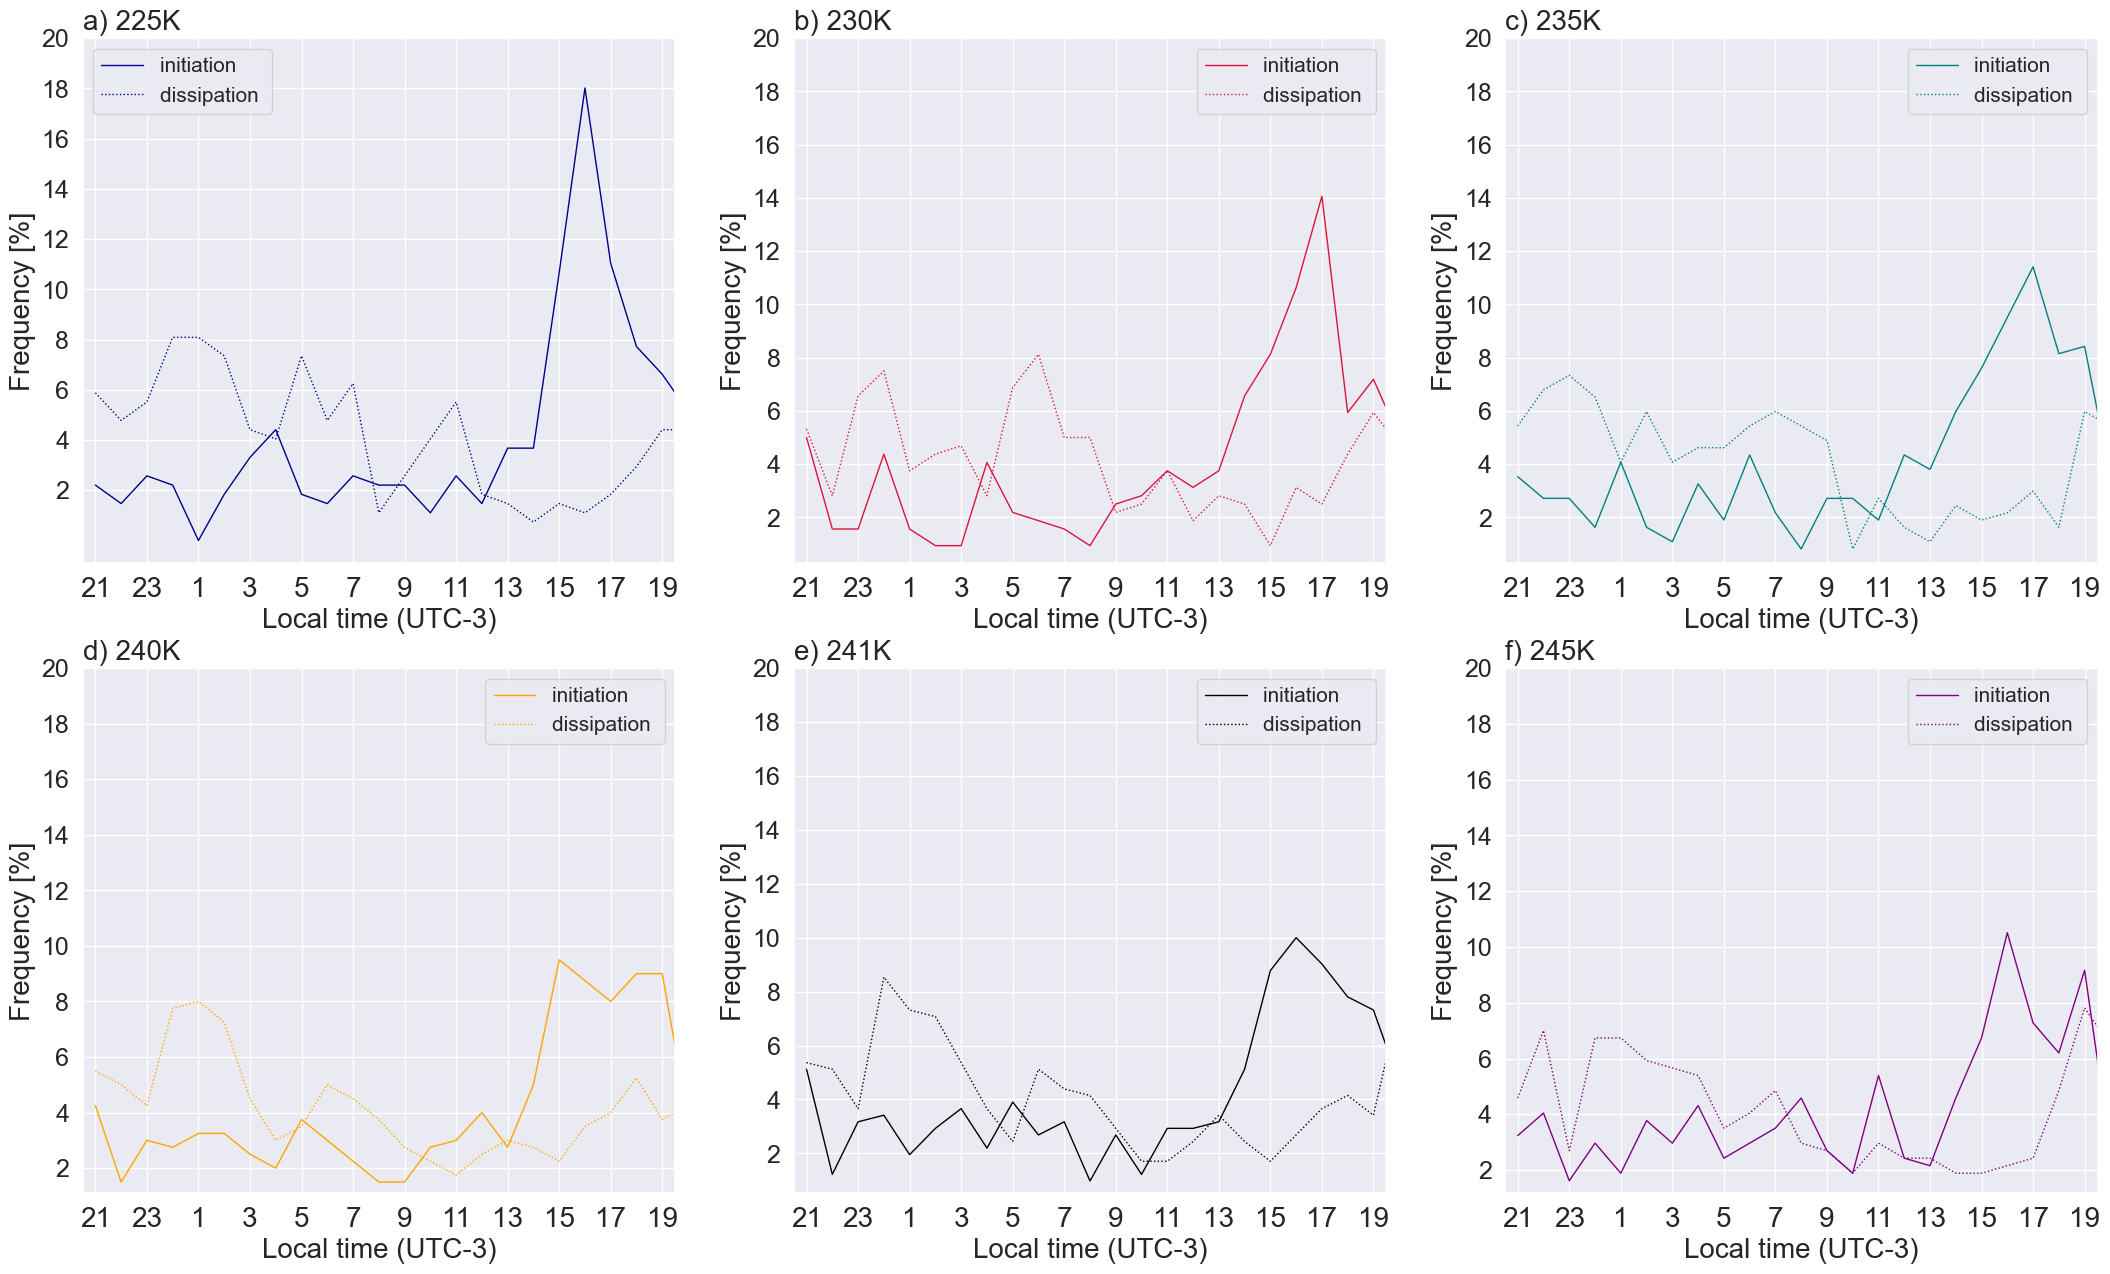

In [7]:
#plot of initiation time of MCSs 
import seaborn as sns 
sns.set()

plt.figure(figsize=(26,15))
f= 20
lf= 15

ax1 = plt.subplot(2, 3, 1) 
ax1.set_title('a) 225K ', loc='left', fontsize= f )
ax1.plot(np.arange(0,24), init_225, label = 'initiation ', color= 'darkblue', linewidth = 1)
ax1.plot(np.arange(0,24), diss_225, label = 'dissipation ', color= 'darkblue', linewidth = 1, linestyle = 'dotted')
ax1.legend(fontsize=lf)

a= np.arange(21,24,2)
b= np.arange(1,20,2)
localtime= np.append(a, b)

labels=localtime.astype(str)
ax1.set_yticks(np.arange(2,22,2))
ax1.set_xticks(np.arange(0,23)[::2])
ax1.set_yticklabels(ax1.get_yticks(),fontsize=18)
ax1.set_xticklabels(labels,fontsize= f)
ax1.set_xlim(-0.5,22.5)
ax1.set_xlabel('Local time (UTC-3)', fontsize= f)
ax1.set_ylabel('Frequency [%]', fontsize= f)

labels=localtime.astype(str)
ax2 = plt.subplot(2, 3, 2) 
ax2.set_title('b) 230K ', loc='left', fontsize= f )
ax2.plot(np.arange(0,24), init_230, label = 'initiation ', color= 'crimson', linewidth = 1)
ax2.plot(np.arange(0,24), diss_230, label = 'dissipation ', color= 'crimson', linewidth = 1, linestyle = 'dotted')
ax2.legend(fontsize=lf)
ax2.set_yticks(np.arange(2,22,2))
ax2.set_xticks(np.arange(0,23)[::2])
ax2.set_xticklabels(labels,fontsize= f)
ax2.set_xlim(-0.5,22.5)
ax2.set_yticklabels(ax2.get_yticks(),fontsize=18)
ax2.set_xlabel('Local time (UTC-3)', fontsize= f)
ax2.set_ylabel('Frequency [%]', fontsize= f)

ax3 = plt.subplot(2, 3, 3) 
ax3.set_title('c) 235K ', loc='left', fontsize= f )
ax3.plot(np.arange(0,24), init_235, label = 'initiation ', color= 'teal', linewidth = 1)
ax3.plot(np.arange(0,24), diss_235, label = 'dissipation ', color= 'teal', linewidth = 1, linestyle = 'dotted')
ax3.legend(fontsize=lf)
ax3.set_yticks(np.arange(2,22,2))
ax3.set_xticks(np.arange(0,23)[::2])
ax3.set_yticklabels(ax3.get_yticks(),fontsize=18)
ax3.set_xticklabels(labels,fontsize= f)
ax3.set_xlim(-0.5,22.5)
ax3.set_xlabel('Local time (UTC-3)', fontsize= f)
ax3.set_ylabel('Frequency [%]', fontsize= f)

ax4 = plt.subplot(2, 3, 4) 
ax4.set_title('d) 240K ', loc='left', fontsize= f )
ax4.plot(np.arange(0,24), init_240, label = 'initiation ', color= 'orange', linewidth = 1)
ax4.plot(np.arange(0,24), diss_240, label = 'dissipation ', color= 'orange', linewidth = 1, linestyle = 'dotted')
ax4.legend(fontsize=lf)
ax4.set_yticks(np.arange(2,22,2))
ax4.set_xticks(np.arange(0,23)[::2])
ax4.set_yticklabels(ax4.get_yticks(),fontsize=18)
ax4.set_xticklabels(labels,fontsize= f)
ax4.set_xlim(-0.5,22.5)
ax4.set_xlabel('Local time (UTC-3)', fontsize= f)
ax4.set_ylabel('Frequency [%]', fontsize= f)

ax5 = plt.subplot(2, 3, 5) 
ax5.set_title('e) 241K ', loc='left', fontsize= f )
ax5.plot(np.arange(0,24), init_241, label = 'initiation ', color= 'black', linewidth = 1)
ax5.plot(np.arange(0,24), diss_241, label = 'dissipation ', color= 'black', linewidth = 1, linestyle = 'dotted')
ax5.legend(fontsize=lf)
ax5.set_yticks(np.arange(2,22,2))
ax5.set_xticks(np.arange(0,23)[::2])
ax5.set_yticklabels(ax5.get_yticks(),fontsize=18)
ax5.set_xticklabels(labels,fontsize= f)
ax5.set_xlim(-0.5,22.5)
ax5.set_xlabel('Local time (UTC-3)', fontsize= f)
ax5.set_ylabel('Frequency [%]', fontsize= f)

ax6 = plt.subplot(2, 3, 6) 
ax6.set_title('f) 245K ', loc='left', fontsize= f )
ax6.plot(np.arange(0,24), init_245, label = 'initiation ', color= 'purple', linewidth = 1)
ax6.plot(np.arange(0,24), diss_245, label = 'dissipation ', color= 'purple', linewidth = 1, linestyle = 'dotted')
ax6.legend(fontsize=lf)
ax6.set_yticks(np.arange(2,22,2))
ax6.set_xticks(np.arange(0,23)[::2])
ax6.set_yticklabels(ax6.get_yticks(),fontsize=18)
ax6.set_xticklabels(labels,fontsize= f)
ax6.set_xlim(-0.5,22.5)
ax6.set_xlabel('Local time (UTC-3)', fontsize= f)
ax6.set_ylabel('Frequency [%]', fontsize= f)

plt.savefig('Plot/Jan_1998/singleTb/Init_diss_Tb_thresholds_Jan1998.png')



In [8]:
init_lats_225, init_lons_225, diss_lats_225, diss_lons_225 = functions.get_init(mcstracks_225)
init_lats_230, init_lons_230, diss_lats_230, diss_lons_230 = functions.get_init(mcstracks_230)
init_lats_235, init_lons_235, diss_lats_235, diss_lons_235 = functions.get_init(mcstracks_235)
init_lats_240, init_lons_240, diss_lats_240, diss_lons_240 = functions.get_init(mcstracks_240)
init_lats_241, init_lons_241, diss_lats_241, diss_lons_241 = functions.get_init(mcstracks_241)
init_lats_245, init_lons_245, diss_lats_245, diss_lons_245 = functions.get_init(mcstracks_245)




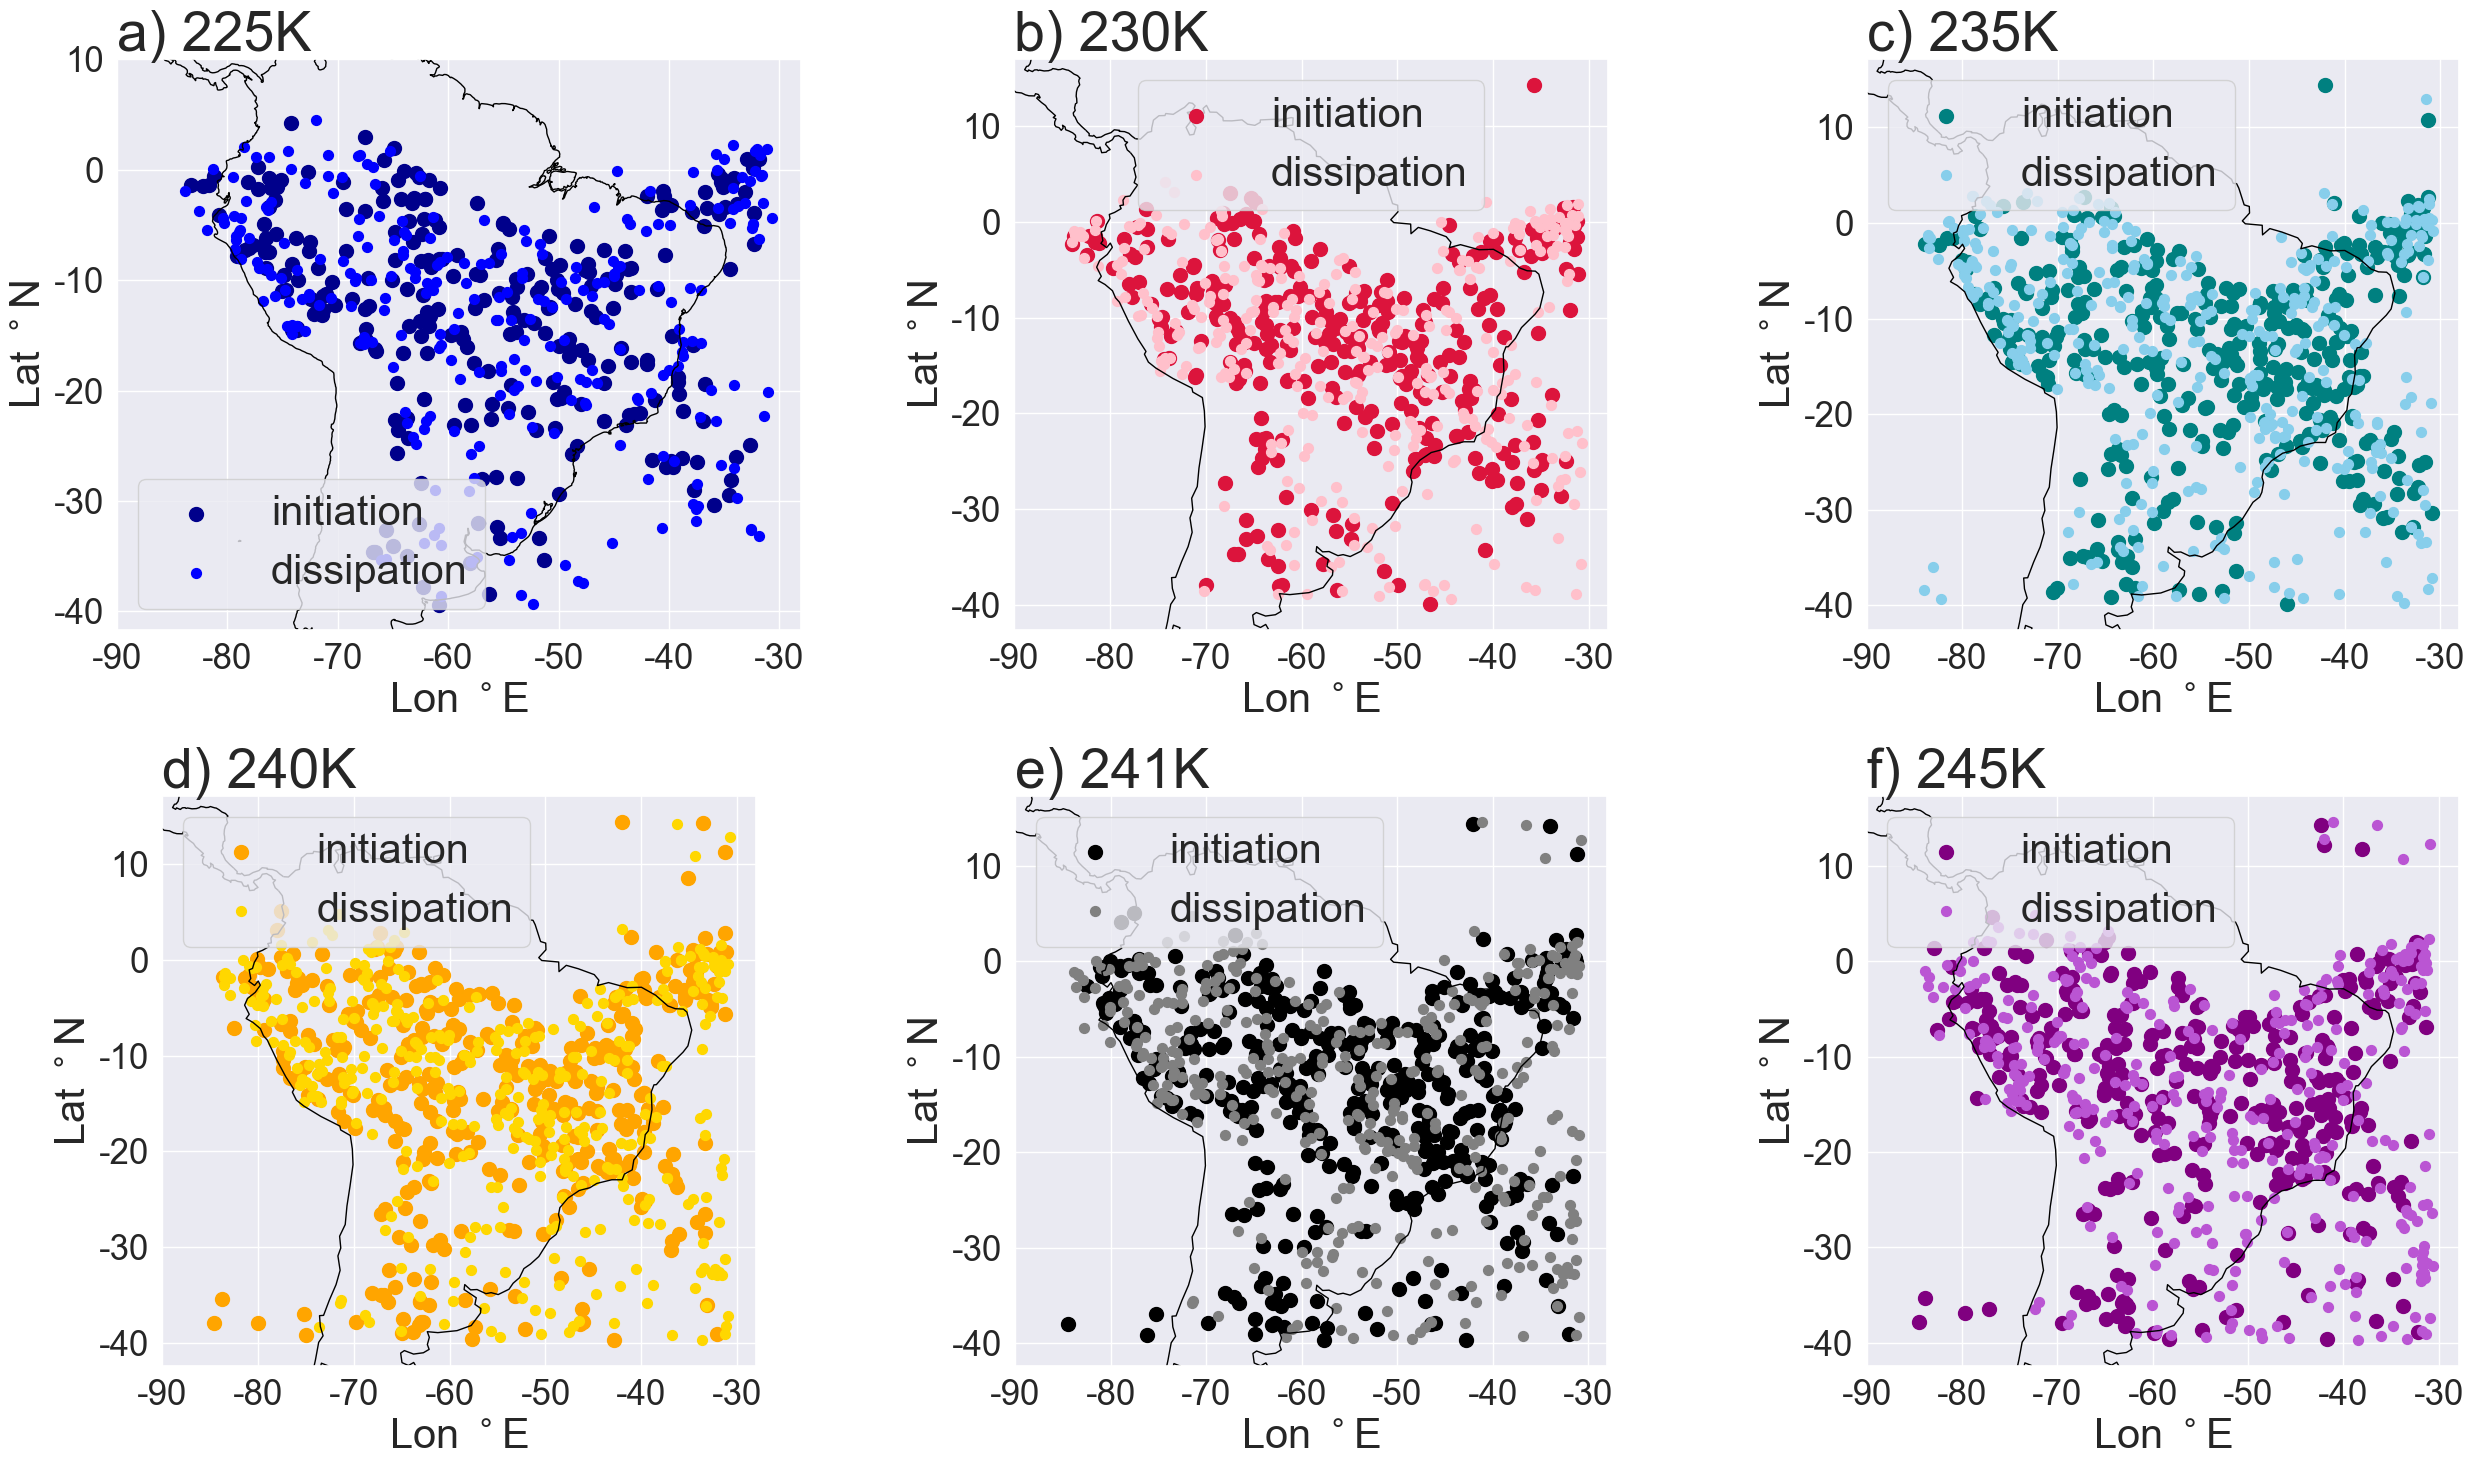

In [22]:
import cartopy.crs as ccrs

fig = plt.figure(figsize=(26,15))
xlabels=[-90,-70,-50,-30]
ylabels= [-40,-30,-20,-10,0,10]
# markersize 
s = 100
#fontsize
f=40

#plt.subplots_adjust(wspace=0,hspace=0)
# Locations of initiation and dissipation of MCSs 
ax1 = plt.subplot(2, 3, 1, projection=ccrs.PlateCarree())
ax1.set_title('a) 225K ', loc='left', fontsize= f )
ax1.scatter(init_lons_225, init_lats_225,  color='darkblue',marker='o', s = s, transform=ccrs.PlateCarree(),label= 'initiation')
ax1.scatter(diss_lons_225, diss_lats_225,  color='blue',marker='o', s = s/2, transform=ccrs.PlateCarree(),label= 'dissipation')
ax1.coastlines()
ax1.legend(fontsize= 30)
ax1.set_xticks(xlabels, xlabels)
ax1.set_yticks(ylabels,ylabels)
ax1.set_xticklabels(ax1.get_xticks().astype(int),fontsize=25)
ax1.set_yticklabels(ax1.get_yticks().astype(int),fontsize=25)
ax1.set_xlabel('Lon $^\circ$E',  fontsize=30)
ax1.set_ylabel('Lat $^\circ$N',  fontsize=30)

ax2 = plt.subplot(2, 3, 2, projection=ccrs.PlateCarree())
ax2.set_title('b) 230K ', loc='left', fontsize= f )
ax2.scatter(init_lons_230, init_lats_230,  color='crimson',marker='o', s = s, transform=ccrs.PlateCarree(),label= 'initiation')
ax2.scatter(diss_lons_230, diss_lats_230,  color='pink',marker='o', s = s/2, transform=ccrs.PlateCarree(),label= 'dissipation')
ax2.coastlines()
ax2.legend(fontsize= 30)
ax2.set_xticks(xlabels, xlabels)
ax2.set_yticks(ylabels,ylabels)
ax2.set_xticklabels(ax1.get_xticks().astype(int),fontsize=25)
ax2.set_yticklabels(ax1.get_yticks().astype(int),fontsize=25)
ax2.set_xlabel('Lon $^\circ$E',  fontsize=30)
ax2.set_ylabel('Lat $^\circ$N',  fontsize=30)

ax3 = plt.subplot(2, 3, 3, projection=ccrs.PlateCarree())
ax3.set_title('c) 235K ', loc='left', fontsize= f )
ax3.scatter(init_lons_235, init_lats_235,  color='teal',marker='o', s = s, transform=ccrs.PlateCarree(),label= 'initiation')
ax3.scatter(diss_lons_235, diss_lats_235,  color='skyblue',marker='o', s = s/2, transform=ccrs.PlateCarree(),label= 'dissipation')
ax3.coastlines()
ax3.legend(fontsize= 30)
ax3.set_xticks(xlabels, xlabels)
ax3.set_yticks(ylabels,ylabels)
ax3.set_xticklabels(ax1.get_xticks().astype(int),fontsize=25)
ax3.set_yticklabels(ax1.get_yticks().astype(int),fontsize=25)
ax3.set_xlabel('Lon $^\circ$E',  fontsize=30)
ax3.set_ylabel('Lat $^\circ$N',  fontsize=30)

ax4 = plt.subplot(2, 3, 4, projection=ccrs.PlateCarree())
ax4.set_title('d) 240K ', loc='left', fontsize= f )
ax4.scatter(init_lons_240, init_lats_240,  color='orange',marker='o', s = s, transform=ccrs.PlateCarree(),label= 'initiation')
ax4.scatter(diss_lons_240, diss_lats_240,  color='gold',marker='o', s = s/2, transform=ccrs.PlateCarree(),label= 'dissipation')
ax4.coastlines()
ax4.legend(fontsize= 30)
ax4.set_xticks(xlabels, xlabels)
ax4.set_yticks(ylabels,ylabels)
ax4.set_xticklabels(ax1.get_xticks().astype(int),fontsize=25)
ax4.set_yticklabels(ax1.get_yticks().astype(int),fontsize=25)
ax4.set_xlabel('Lon $^\circ$E',  fontsize=30)
ax4.set_ylabel('Lat $^\circ$N',  fontsize=30)

ax5 = plt.subplot(2, 3, 5, projection=ccrs.PlateCarree())
ax5.set_title('e) 241K ', loc='left', fontsize= f )
ax5.scatter(init_lons_241, init_lats_241,  color='black',marker='o', s = s, transform=ccrs.PlateCarree(),label= 'initiation')
ax5.scatter(diss_lons_241, diss_lats_241,  color='grey',marker='o', s = s/2, transform=ccrs.PlateCarree(),label= 'dissipation')
ax5.coastlines()
ax5.legend(fontsize= 30)
ax5.set_xticks(xlabels, xlabels)
ax5.set_yticks(ylabels,ylabels)
ax5.set_xticklabels(ax1.get_xticks().astype(int),fontsize=25)
ax5.set_yticklabels(ax1.get_yticks().astype(int),fontsize=25)
ax5.set_xlabel('Lon $^\circ$E',  fontsize=30)
ax5.set_ylabel('Lat $^\circ$N',  fontsize=30)

ax6 = plt.subplot(2, 3, 6, projection=ccrs.PlateCarree())
ax6.set_title('f) 245K ', loc='left', fontsize= f )
ax6.scatter(init_lons_245, init_lats_245,  color='purple',marker='o', s = s, transform=ccrs.PlateCarree(),label= 'initiation')
ax6.scatter(diss_lons_245, diss_lats_245,  color='mediumorchid',marker='o', s = s/2, transform=ccrs.PlateCarree(),label= 'dissipation')
ax6.coastlines()
ax6.legend(fontsize= 30)
ax6.set_xticks(xlabels, xlabels)
ax6.set_yticks(ylabels,ylabels)
ax6.set_xticklabels(ax1.get_xticks().astype(int),fontsize=25)
ax6.set_yticklabels(ax1.get_yticks().astype(int),fontsize=25)
ax6.set_xlabel('Lon $^\circ$E',  fontsize=30)
ax6.set_ylabel('Lat $^\circ$N',  fontsize=30)

fig.tight_layout()

plt.savefig('Plot/Jan_1998/singleTb/Init_diss_loc_Tb_thresholds_Jan1998.png')


**MCS area analysis (converts from grid points to area (km2) within function)**

In [10]:
area_225=functions.get_area(mcstracks_225)
area_230=functions.get_area(mcstracks_230)
area_235=functions.get_area(mcstracks_235)
area_240=functions.get_area(mcstracks_240)
area_241=functions.get_area(mcstracks_241)
area_245=functions.get_area(mcstracks_245)


array of MCS areas generated.
array of MCS areas generated.
array of MCS areas generated.
array of MCS areas generated.
array of MCS areas generated.
array of MCS areas generated.


In [11]:
print(area_225)

[ 79265.57412965 289881.          95218.14130435 146699.4375
  93775.98913043 132082.96153846  75210.34090909 148140.32142857
 112326.75        99503.4375      96157.125      119164.5
 154275.91363636 119674.38461538  90193.5        106378.65
 118359.          90615.06818182 107923.82142857  87584.14285714
 103362.75        62479.77631579  68871.69642857  50546.89285714
 226895.72727273 159248.53125    115362.          94944.53571429
 110142.36290323 122380.2         68758.875       89346.61607143
  73835.66911765 129277.265625    80701.11       130442.66129032
  72348.75        74543.82352941 419604.41911765 121166.65384615
  83519.52631579  80809.07142857  98264.57142857  65957.36538462
  67126.21875    240504.1875      63103.5        143491.5
  55524.05357143  63892.125       92603.25       102978.61363636
  72816.83035714  91638.         294761.025       96977.25
 217000.55769231  53402.14285714  57386.25        95313.22826087
 465187.33928571 185036.71153846 150938.82692308 136470

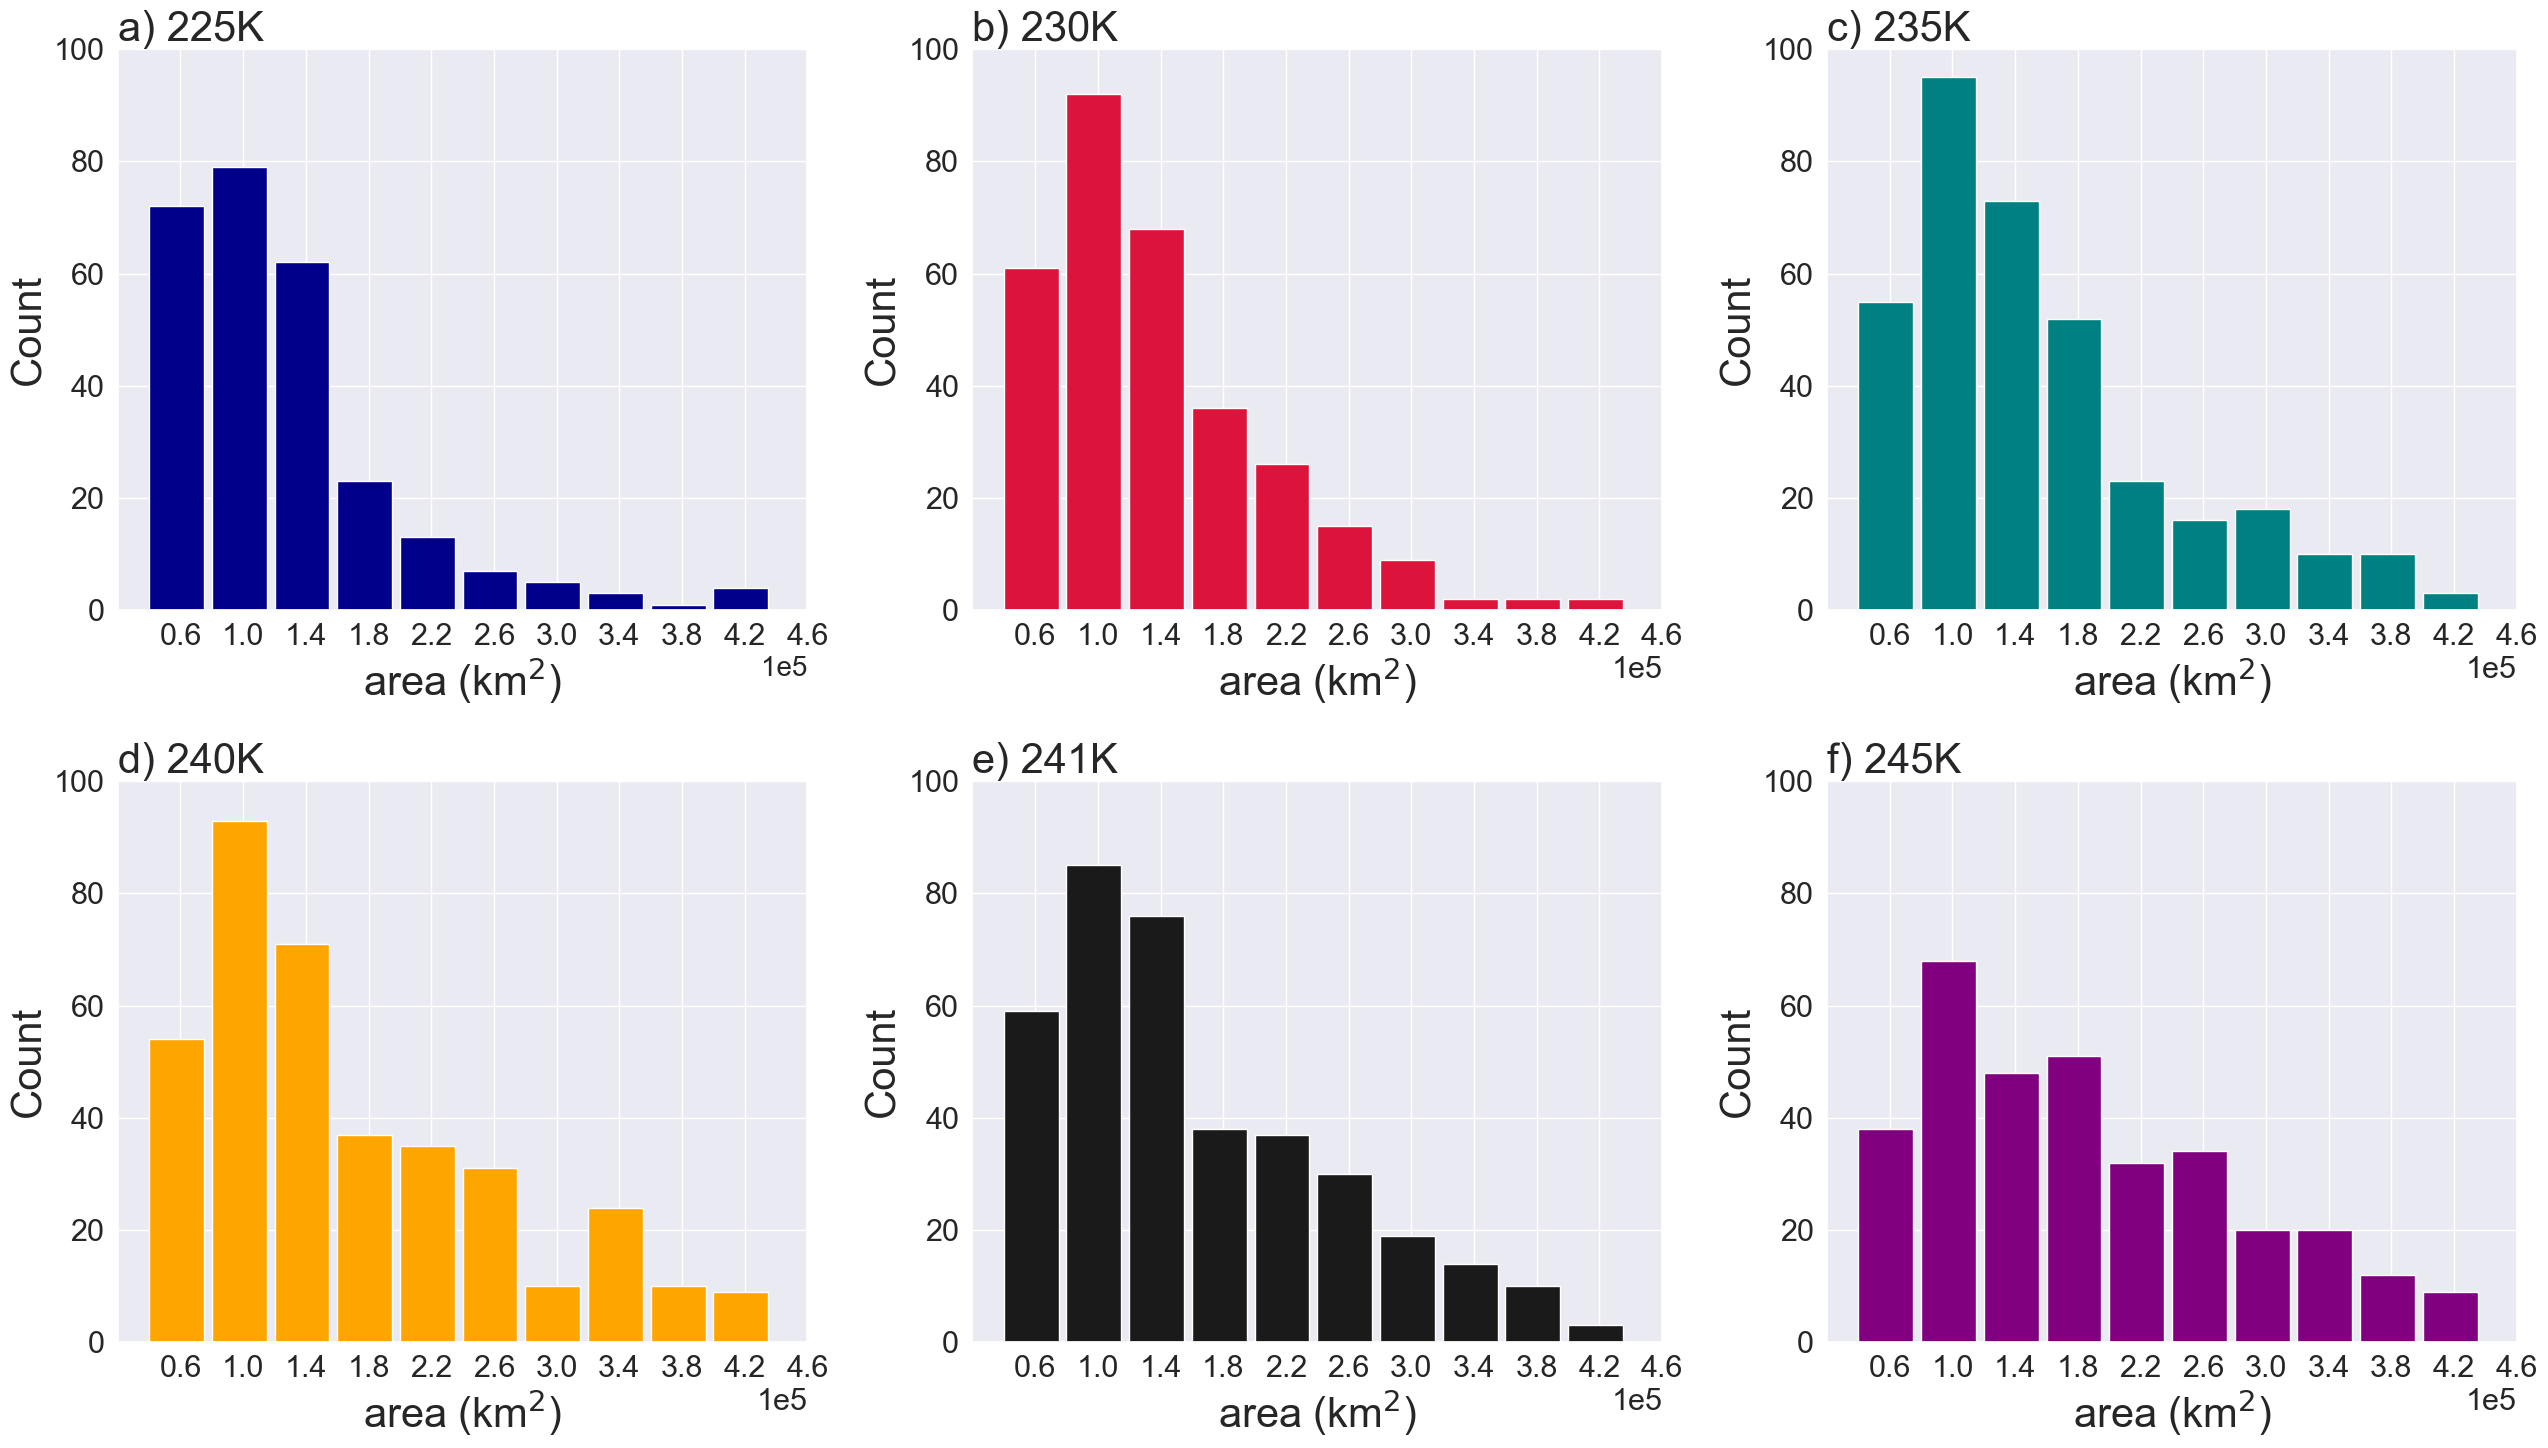

In [12]:
#plot of initiation time of MCSs 
import seaborn as sns 
sns.set(font_scale=2)

fig = plt.figure(figsize=(26,15))
f= 30
lf= 15

ax1.tick_params(labelsize=24)

ax1=plt.subplot(2,3,1)
ax1.set_title('a) 225K ', loc='left', fontsize= f )
ax1.hist(area_225,bins=[40000,80000,120000,160000,200000,240000,280000,320000,360000,400000,440000],width=35000,color= 'darkblue',align='mid')
ax1.set_xlabel('area (km$^{2}$)', fontsize= f)
ax1.set_xticks([60000,100000,140000,180000,220000,260000,300000,340000,380000,420000,460000])
ax1.set_yticks([0,20,40,60,80,100])
ax1.ticklabel_format(style='sci', axis='x', scilimits=(0,0))
ax1.xaxis.get_offset_text().set_fontsize(20)
ax1.set_ylabel('Count',fontsize=f)

ax2=plt.subplot(2,3,2)
ax2.set_title('b) 230K ', loc='left', fontsize= f )
ax2.hist(area_230,bins=[40000,80000,120000,160000,200000,240000,280000,320000,360000,400000,440000],width=35000,color= 'crimson',align='mid')
ax2.set_xlabel('area (km$^{2}$)', fontsize= f)
ax2.set_xticks([60000,100000,140000,180000,220000,260000,300000,340000,380000,420000,460000])
ax2.set_yticks([0,20,40,60,80,100])
ax2.ticklabel_format(style='sci', axis='x', scilimits=(0,0))
ax2.set_ylabel('Count',fontsize=f)

ax3=plt.subplot(2,3,3)
ax3.set_title('c) 235K ', loc='left', fontsize= f )
ax3.hist(area_235,bins=[40000,80000,120000,160000,200000,240000,280000,320000,360000,400000,440000],width=35000,color= 'teal',align='mid')
ax3.set_xlabel('area (km$^{2}$)', fontsize= f)
ax3.set_xticks([60000,100000,140000,180000,220000,260000,300000,340000,380000,420000,460000])
ax3.set_yticks([0,20,40,60,80,100])
ax3.ticklabel_format(style='sci', axis='x', scilimits=(0,0))
ax3.set_ylabel('Count',fontsize=f)

ax4=plt.subplot(2,3,4)
ax4.set_title('d) 240K ', loc='left', fontsize= f )
ax4.hist(area_240,bins=[40000,80000,120000,160000,200000,240000,280000,320000,360000,400000,440000],width=35000,color= 'orange',align='mid')
ax4.set_xlabel('area (km$^{2}$)', fontsize= f)
ax4.set_xticks([60000,100000,140000,180000,220000,260000,300000,340000,380000,420000,460000])
ax4.set_yticks([0,20,40,60,80,100])
ax4.ticklabel_format(style='sci', axis='x', scilimits=(0,0))
ax4.set_ylabel('Count',fontsize=f)

ax5=plt.subplot(2,3,5)
ax5.set_title('e) 241K ', loc='left', fontsize= f )
ax5.hist(area_241,bins=[40000,80000,120000,160000,200000,240000,280000,320000,360000,400000,440000],width=35000,color= 'k',align='mid')
ax5.set_xlabel('area (km$^{2}$)', fontsize= f)
ax5.set_xticks([60000,100000,140000,180000,220000,260000,300000,340000,380000,420000,460000])
ax5.set_yticks([0,20,40,60,80,100])
ax5.ticklabel_format(style='sci', axis='x', scilimits=(0,0))
ax5.set_ylabel('Count',fontsize=f)

ax6=plt.subplot(2,3,6)
ax6.set_title('f) 245K ', loc='left', fontsize= f )
ax6.hist(area_245,bins=[40000,80000,120000,160000,200000,240000,280000,320000,360000,400000,440000],width=35000,color= 'purple',align='mid')
ax6.set_xlabel('area (km$^{2}$)', fontsize= f)
ax6.set_xticks([60000,100000,140000,180000,220000,260000,300000,340000,380000,420000,460000])
ax6.set_yticks([0,20,40,60,80,100])
ax6.ticklabel_format(style='sci', axis='x', scilimits=(0,0))
ax6.set_ylabel('Count',fontsize=f)

fig.tight_layout()
plt.savefig('Plot/Jan_1998/singleTb/area_hist_Tb_thresholds_Jan1998.png')


**Analysis of MCS velocity/propagation speed**

In [13]:
#first need to run the tobac calculate velocity function before running my own function to create the histogram
vel_225= tobac.calculate_velocity(mcstracks_225, method_distance=None)
vel_230= tobac.calculate_velocity(mcstracks_230, method_distance=None)
vel_235= tobac.calculate_velocity(mcstracks_235, method_distance=None)
vel_240= tobac.calculate_velocity(mcstracks_240, method_distance=None)
vel_241= tobac.calculate_velocity(mcstracks_241, method_distance=None)
vel_245= tobac.calculate_velocity(mcstracks_245, method_distance=None)

In [14]:
velocity_225=functions.get_v(vel_225)
velocity_230=functions.get_v(vel_230)
velocity_235=functions.get_v(vel_235)
velocity_240=functions.get_v(vel_240)
velocity_241=functions.get_v(vel_241)
velocity_245=functions.get_v(vel_245)

propagation speed histo calculated.
propagation speed histo calculated.
propagation speed histo calculated.
propagation speed histo calculated.
propagation speed histo calculated.
propagation speed histo calculated.


In [15]:
import numpy as np

def bins_labels(bins, **kwargs):
    bin_w = (max(bins) - min(bins)) / (len(bins))
    plt.xticks(np.arange(min(bins)+bin_w/2, max(bins), bin_w), bins, **kwargs)
    plt.xlim(bins[0], bins[-1])
    return bins

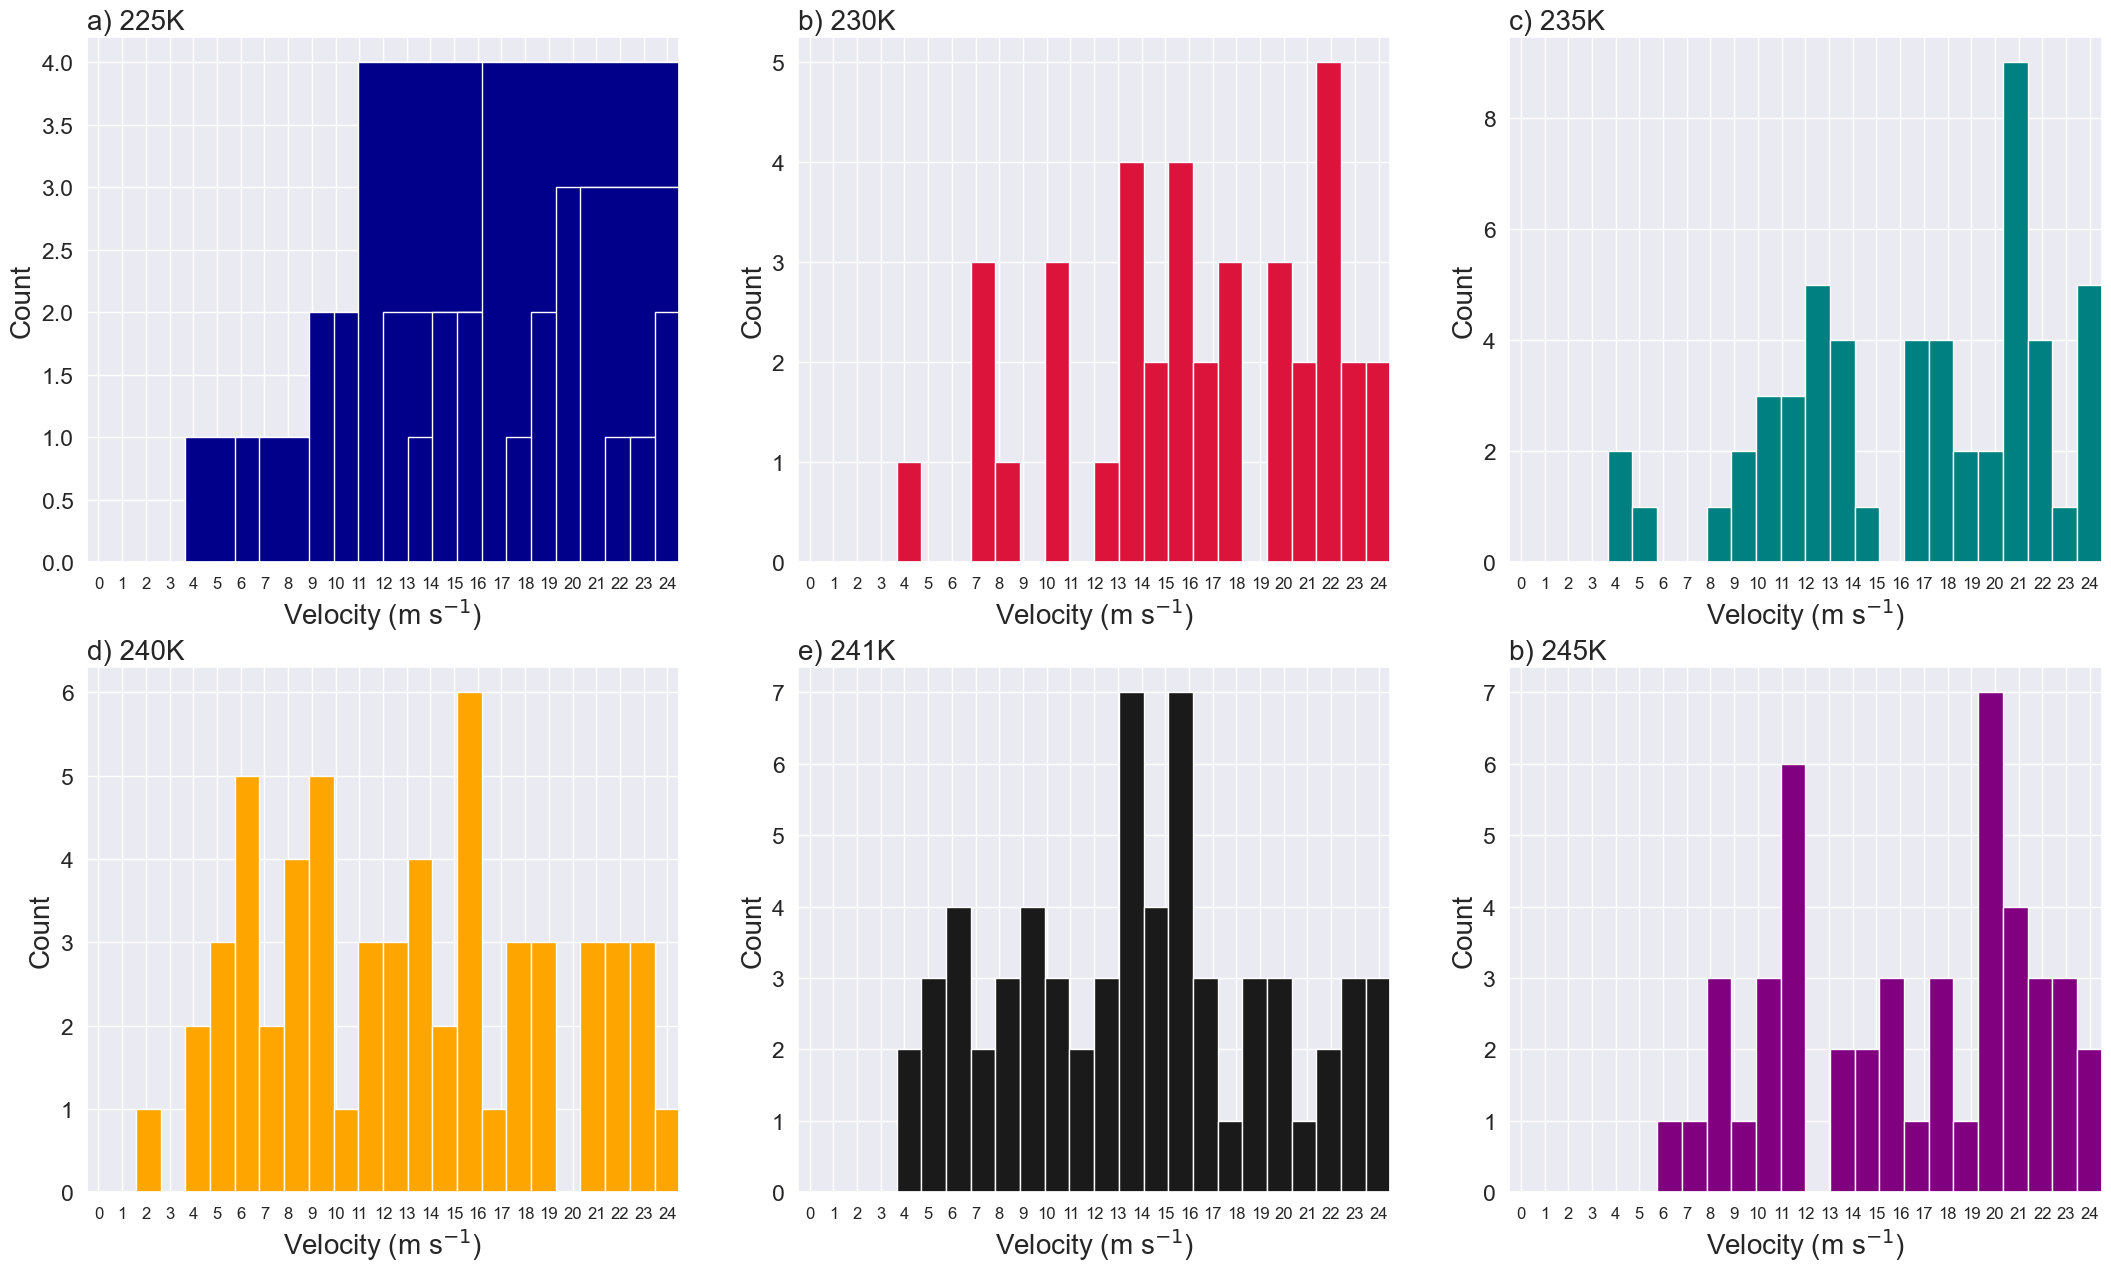

In [16]:
#plot of initiation time of MCSs 
import seaborn as sns 
sns.set(font_scale=1.5)

plt.figure(figsize=(26,15))
f= 20
lf= 15

ax1 = plt.subplot(2,3,1)
ax1.set_title('a) 225K ', loc='left', fontsize= f)
#bins = np.arange(0,300,20)
ax1.hist(velocity_225, bins=bins,color='darkblue',width=18,align='mid')
ax1.set_xlabel('Velocity (m s$^{-1}$)',fontsize=f)
ax1.set_ylabel('Count',fontsize=f)
bins_labels(bins,fontsize=12)

ax2= plt.subplot(2,3,2)
ax2.set_title('b) 230K ', loc='left', fontsize= f)
bins = bins
ax2.hist(velocity_230, bins=bins,align='mid',color='crimson')
ax2.set_xlabel('Velocity (m s$^{-1}$)',fontsize=f)
ax2.set_ylabel('Count',fontsize=f)
bins_labels(bins,fontsize=12)

ax3= plt.subplot(2,3,3)
ax3.set_title('c) 235K ', loc='left', fontsize= f)
bins = bins
ax3.hist(velocity_235, bins=bins,align='mid',color='teal')
ax3.set_xlabel('Velocity (m s$^{-1}$)',fontsize=f)
ax3.set_ylabel('Count',fontsize=f)
bins_labels(bins,fontsize=12)

ax4= plt.subplot(2,3,4)
ax4.set_title('d) 240K ', loc='left', fontsize= f)
bins = bins
ax4.hist(velocity_240, bins=bins,align='mid',color='orange')
ax4.set_xlabel('Velocity (m s$^{-1}$)',fontsize=f)
ax4.set_ylabel('Count',fontsize=f)
bins_labels(bins,fontsize=12)

ax5= plt.subplot(2,3,5)
ax5.set_title('e) 241K ', loc='left', fontsize= f)
bins = bins
ax5.hist(velocity_241, bins=bins,align='mid',color='k')
ax5.set_xlabel('Velocity (m s$^{-1}$)',fontsize=f)
ax5.set_ylabel('Count',fontsize=f)
bins_labels(bins,fontsize=12)

ax6= plt.subplot(2,3,6)
ax6.set_title('b) 245K ', loc='left', fontsize= f)
bins = bins
ax6.hist(velocity_245, bins=bins,align='mid',color='purple')
ax6.set_xlabel('Velocity (m s$^{-1}$)',fontsize=f)
ax6.set_ylabel('Count',fontsize=f)
bins_labels(bins,fontsize=12)

plt.savefig('Plot/Jan_1998/singleTb/vel_hist_Tb_thresholds_Jan1998.png')

